# Machine Learning for Text Analysis: Text Classification (Project)

-----

## Table of Contents


[1. Imports](#1.-Imports)
   
[2. Load the Data](#2.-Load-the-Data)

[3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))

[4. Text Analysis: Document Classification](#4.-Text-Analysis:-Document-Classification)
 
- [4.1. Naive Bayes Classifier](#4.1.-Naive-Bayes-Classifier)
    - [4.1.1. Naive Bayes Classifier (with CountVectorizer)](#4.1.1.-Naive-Bayes-Classifier-(with-CountVectorizer))
    - [4.1.2.Naive Bayes Classifier (with TF-IDF)](#4.1.2.-Naive-Bayes-Classifier-(with-TF-IDF))
- [4.2. Support Vector Machine(SVM): Linear SVC](#4.2.-Support-Vector-Machine(SVM):-Linear-SVC)
- [4.3. Logistic Regression](#4.3.-Logistic-Regression)


## 1. Imports

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils_data.confusion as cm

from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC

import warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")

## 2. Load the Data

*Project Data Set: [UCI twenty newsgroup][ucid]*

[ucid]: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html

In [4]:
# Load dataset

# Training text set
train = fetch_20newsgroups(data_home='.', subset='train')
# Testing text set
test = fetch_20newsgroups(data_home='.', subset='test')
print(train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


## 3. Exploratory Data Analysis (EDA)

In [26]:
# Exploratory Data Analysis (EDA)

print(f"Number of Training Samples: {len(train['data']):,}") 
print(f"Number of Testing Samples: {len(test['data']):,}")

separator_width = 40
print('-' * separator_width)

print(f"{'Class ID':<12} | {'Label Name':<25}")
print('-' * separator_width)

for idx, label in enumerate(train['target_names']):
    # Left-align the index and label name within specified widths
    print(f'{idx:<12} | {label:<25}')

print('-' * separator_width)

Number of Training Samples: 11,314
Number of Testing Samples: 7,532
----------------------------------------
Class ID     | Label Name               
----------------------------------------
0            | alt.atheism              
1            | comp.graphics            
2            | comp.os.ms-windows.misc  
3            | comp.sys.ibm.pc.hardware 
4            | comp.sys.mac.hardware    
5            | comp.windows.x           
6            | misc.forsale             
7            | rec.autos                
8            | rec.motorcycles          
9            | rec.sport.baseball       
10           | rec.sport.hockey         
11           | sci.crypt                
12           | sci.electronics          
13           | sci.med                  
14           | sci.space                
15           | soc.religion.christian   
16           | talk.politics.guns       
17           | talk.politics.mideast    
18           | talk.politics.misc       
19           | talk.religion.m

In [27]:
# Print a single article and display information

def display_article_info(dataset, item_index):
    """
    Prints detailed information (class number, class name, and text content)
    for a specific article index within a given dataset (e.g., 'train' or 'test').
    """
    try:
        # Use a descriptive variable name for the target value
        class_index = dataset['target'][item_index]
        class_name = dataset['target_names'][class_index]
        article_text = dataset['data'][item_index]
        
        # Define a consistent separator width
        separator_width = 85

        # Print the metadata with clear labels and alignment
        print("-" * separator_width)
        print(f"--- Article Information (Index {item_index}) ---")
        print("-" * separator_width)
        # Using f-strings with alignment for neat display
        print(f"{'Class Number:':<20} {class_index}")
        print(f"{'Class Name:':<20} {class_name}")
        print("-" * separator_width)
        
        # Print the main content
        print(f"\n--- Article Content ---\n")
        # Ensure the content itself is handled gracefully (e.g., handles long text)
        print(article_text)
        print("\n" + "-" * separator_width)

    except IndexError:
        print(f"Error: Item index {item_index} is out of bounds for the provided dataset.")
    except KeyError as e:
        print(f"Error: Missing expected key in the dataset dictionary: {e}")


# Print a single article and display information:
item_number = 178
display_article_info(dataset=train, item_index=item_number)

-------------------------------------------------------------------------------------
--- Article Information (Index 178) ---
-------------------------------------------------------------------------------------
Class Number:        3
Class Name:          comp.sys.ibm.pc.hardware
-------------------------------------------------------------------------------------

--- Article Content ---

From: iisakkil@lk-hp-22.hut.fi (Mika Iisakkila)
Subject: Re: DX3/99
In-Reply-To: robert.desonia@hal9k.ann-arbor.mi.us's message of 5 Apr 93 23:53:00 GMT
Nntp-Posting-Host: lk-hp-22.hut.fi
Organization: Helsinki University of Technology, Finland
Lines: 16

robert.desonia@hal9k.ann-arbor.mi.us (Robert Desonia)  writes:
>I heard the rumor as well, but the story differed.  Intel was not coming 
>out with the tripling clock 486, a clone from IBM was.

No rumour, IBM's clock tripling chip was seen in some trade show last
fall (COMDEX or something, I wasn't there). All you people who are
drooling after this

In [7]:
# Print a single article and display information
item_number = 178
display_article_info(dataset=test, item_index=item_number)

-------------------------------------------------------------------------------------
--- Article Information (Index 178) ---
-------------------------------------------------------------------------------------
Class Number:        10
Class Name:          rec.sport.hockey
-------------------------------------------------------------------------------------

--- Article Content ---

From: LMARSHA@cms.cc.wayne.edu (Laurie Marshall)
Subject: Re: Where's Roger?
Organization: Wayne State University, Detroit MI  U.S.A.
Lines: 25
NNTP-Posting-Host: cms.cc.wayne.edu

In article <franjion.735590256@spot.Colorado.EDU>
franjion@spot.Colorado.EDU (John Franjione) writes:
 
>Unfortunately, Roger is now over at r.s.baseball spewing his expertise
>(i.e. being a dickhead).  I guess he is afraid of posting anything
>here, because he knows what to expect.
>--
>John Franjione
>Department of Chemical Engineering
>University of Colorado, Boulder
>franjion@spot.colorado.edu
 
 
 
 Hey, we could start a new

***
## 4. Text Analysis: Document Classification


In [8]:
# Display a piece of message in the test set
test_message_index = 2
display_article_info(dataset=test, item_index=test_message_index)

-------------------------------------------------------------------------------------
--- Article Information (Index 2) ---
-------------------------------------------------------------------------------------
Class Number:        0
Class Name:          alt.atheism
-------------------------------------------------------------------------------------

--- Article Content ---

From: mathew <mathew@mantis.co.uk>
Subject: Re: STRONG & weak Atheism
Organization: Mantis Consultants, Cambridge. UK.
X-Newsreader: rusnews v1.02
Lines: 9

acooper@mac.cc.macalstr.edu (Turin Turambar, ME Department of Utter Misery) writes:
> Did that FAQ ever got modified to re-define strong atheists as not those who
> assert the nonexistence of God, but as those who assert that they BELIEVE in 
> the nonexistence of God?

In a word, yes.


mathew


-------------------------------------------------------------------------------------


***
### 4.1. Naive Bayes Classifier

*The use a [Multinomial Naive Bayes][mnb] Model.*

[mnb]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

#### 4.1.1. Naive Bayes Classifier (with CountVectorizer)

In [9]:
# Classify text with Naive Bayes: Multinomial Naive Bayes model

# Create DTM
cv = CountVectorizer(stop_words='english')
train_dtm = cv.fit_transform(train['data'])
test_dtm = cv.transform(test['data'])

# Initialize the Classifier
nb = MultinomialNB()

nb.fit(train_dtm, train['target'])

# Predict and display score
predicted = nb.predict(test_dtm)
score = nb.score(test_dtm, test['target'])
print(f'Naive Bayes prediction accuracy = {score:.2%}')

Naive Bayes prediction accuracy = 80.23%


In [10]:
# Classification report
cm.display_classification_report(test['target'], predicted, target_names = test['target_names'])

                      Classification Report                      
-----------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.81      0.80       319
           comp.graphics       0.65      0.80      0.72       389
 comp.os.ms-windows.misc       0.80      0.04      0.08       394
comp.sys.ibm.pc.hardware       0.55      0.80      0.65       392
   comp.sys.mac.hardware       0.85      0.79      0.82       385
          comp.windows.x       0.69      0.84      0.76       395
            misc.forsale       0.89      0.74      0.81       390
               rec.autos       0.89      0.92      0.91       396
         rec.motorcycles       0.95      0.94      0.95       398
      rec.sport.baseball       0.95      0.92      0.93       397
        rec.sport.hockey       0.92      0.97      0.94       399
               sci.crypt       0.80      0.96      0.87       396
         

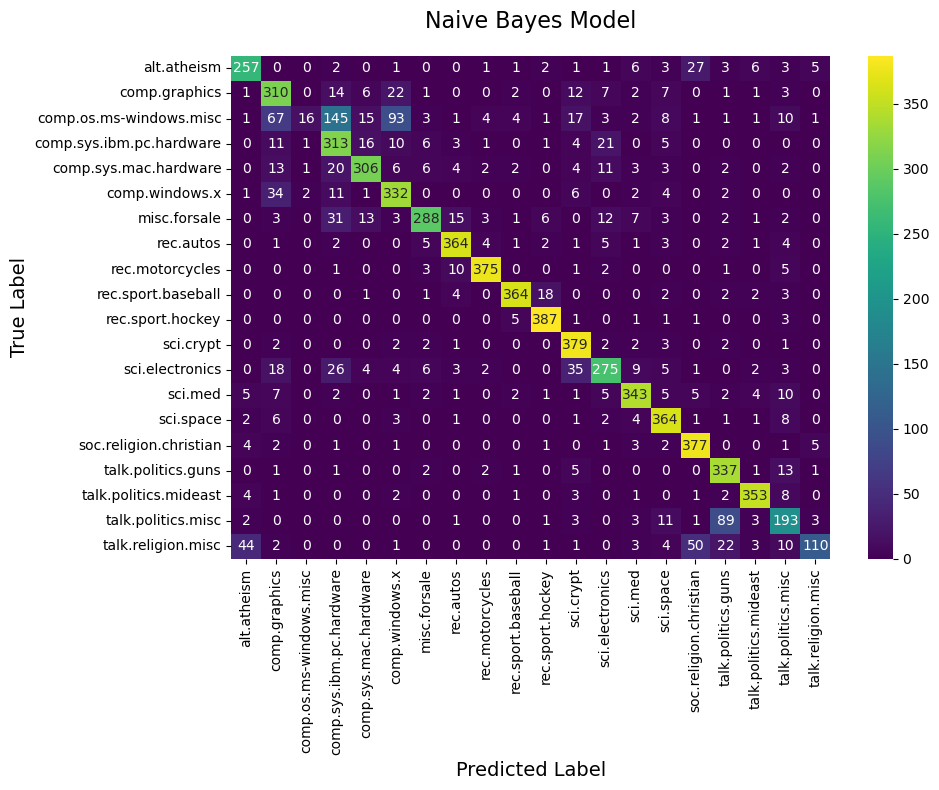

In [11]:
# Confusion Matrix Plot
cm.plot_confusion_matrix(test['target'], predicted, test['target_names'], 'Naive Bayes Model')

#### 4.1.2. Naive Bayes Classifier (with TF-IDF)

In [12]:
# Create DTM
tf_cv = TfidfVectorizer(stop_words='english')
train_dtm_tf = tf_cv.fit_transform(train['data'])
test_dtm_tf = tf_cv.transform(test['data'])

# Initialize the Multinomial Naive Bayes Classifier
nb = MultinomialNB()

nb = nb.fit(train_dtm_tf, train['target'])

# Predict and display score
predicted = nb.predict(test_dtm_tf)
score = nb.score(test_dtm_tf, test['target'])
print(f'Naive Bayes (TF-IDF with Stop Words) prediction accuracy = {score:.2%}')

Naive Bayes (TF-IDF with Stop Words) prediction accuracy = 81.69%


In [13]:
# Classification report
cm.display_classification_report(test['target'], predicted, target_names = test['target_names'])

                      Classification Report                      
-----------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.69      0.74       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.79      0.72      0.75       394
comp.sys.ibm.pc.hardware       0.68      0.81      0.74       392
   comp.sys.mac.hardware       0.86      0.81      0.84       385
          comp.windows.x       0.87      0.78      0.82       395
            misc.forsale       0.87      0.80      0.83       390
               rec.autos       0.88      0.91      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.91      0.92      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.75      0.96      0.84       396
         

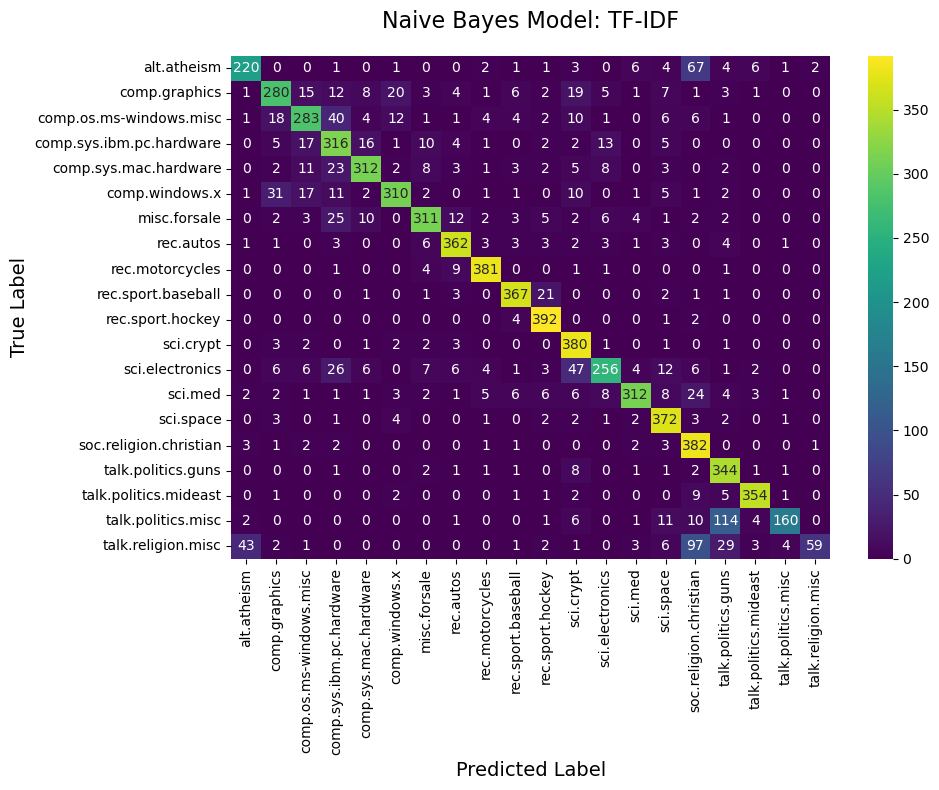

In [16]:
# Confusion Matrix Plot: Naive Bayes and TF-IDF
cm.plot_confusion_matrix(test['target'], predicted, test['target_names'], 'Naive Bayes Model: TF-IDF')

***

### 4.2. Support Vector Machine(SVM): Linear SVC


In [17]:
# Initialize the LinearSVC Classifier
svc = LinearSVC()

svc.fit(train_dtm_tf, train['target'])

# Predict and display score
predicted = svc.predict(test_dtm_tf)
score = svc.score(test_dtm_tf, test['target'])
print(f'SVC (TF-IDF with Stop Words) prediction accuracy = {score:.2%}')

SVC (TF-IDF with Stop Words) prediction accuracy = 85.10%


In [18]:
# Classification report
cm.display_classification_report(test['target'], predicted, target_names = test['target_names'])

                      Classification Report                      
-----------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.83      0.78      0.80       319
           comp.graphics       0.74      0.81      0.78       389
 comp.os.ms-windows.misc       0.77      0.74      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.75      0.73       392
   comp.sys.mac.hardware       0.82      0.85      0.84       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.83      0.89      0.86       390
               rec.autos       0.92      0.90      0.91       396
         rec.motorcycles       0.96      0.96      0.96       398
      rec.sport.baseball       0.91      0.94      0.92       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.93      0.94      0.94       396
         

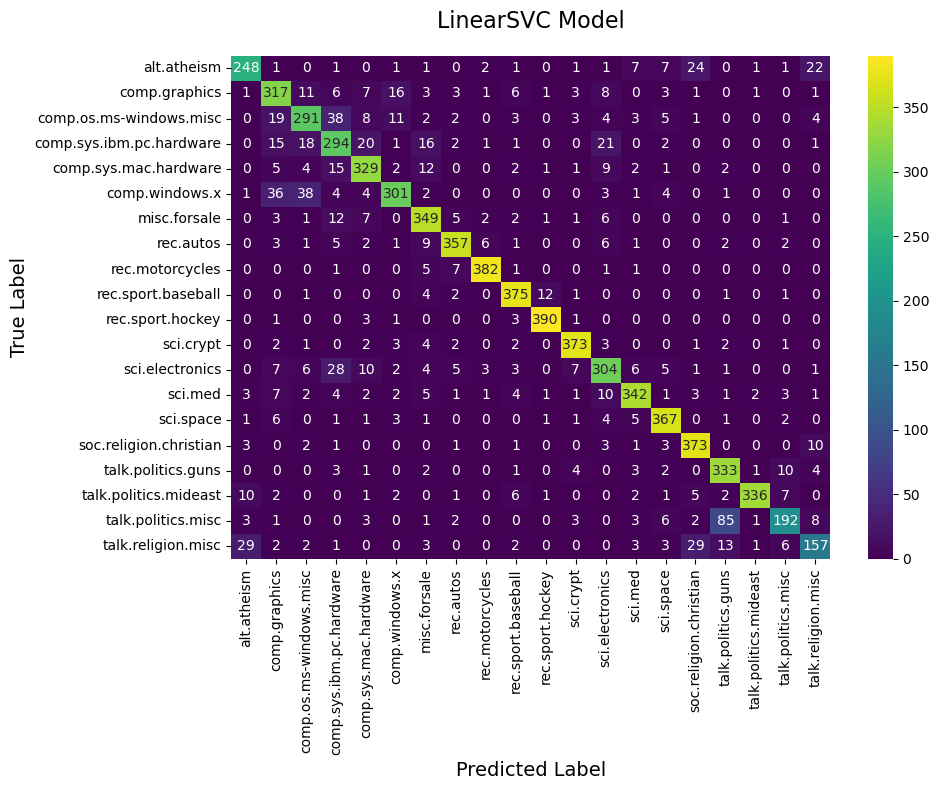

In [19]:
# Confusion Matrix Plot
cm.plot_confusion_matrix(test['target'], predicted, test['target_names'], 'LinearSVC Model')

***

### 4.3. Logistic Regression

In [23]:
# Initialize the Logistic Regression Classifier
lr = LogisticRegression()

lr.fit(train_dtm_tf, train['target'])

# Predict and display score
predicted = lr.predict(test_dtm_tf)
score = lr.score(test_dtm_tf, test['target'])
print(f'LR (TF-IDF with Stop Words) prediction accuracy = {score:.1%}')

LR (TF-IDF with Stop Words) prediction accuracy = 83.2%


In [24]:
cm.display_classification_report(test['target'], predicted, target_names = test['target_names'])

                      Classification Report                      
-----------------------------------------------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.73      0.76       319
           comp.graphics       0.71      0.80      0.75       389
 comp.os.ms-windows.misc       0.75      0.76      0.75       394
comp.sys.ibm.pc.hardware       0.70      0.74      0.72       392
   comp.sys.mac.hardware       0.80      0.83      0.81       385
          comp.windows.x       0.85      0.75      0.80       395
            misc.forsale       0.78      0.87      0.82       390
               rec.autos       0.90      0.89      0.90       396
         rec.motorcycles       0.94      0.95      0.94       398
      rec.sport.baseball       0.88      0.92      0.90       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.95      0.91      0.93       396
         

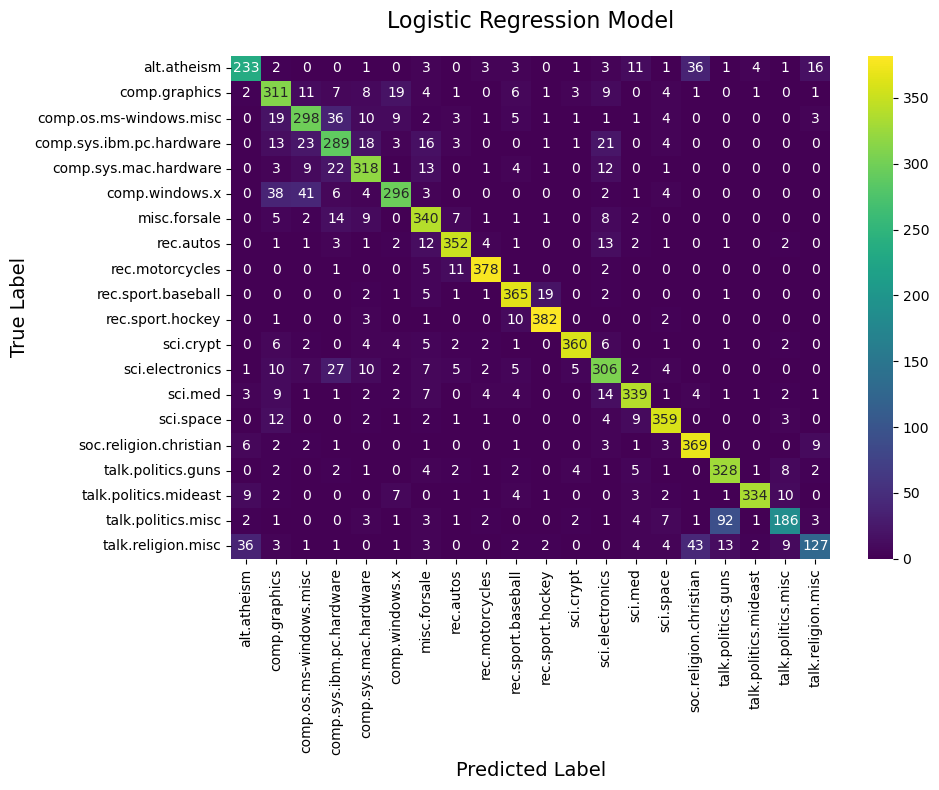

In [25]:
# Confusion Matrix Plot
cm.plot_confusion_matrix(test['target'], predicted, test['target_names'], 'Logistic Regression Model')

***
Author: Dr. Olga D. Khon, PhD in Finance